In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# data = pd.read_csv("C:\\Users\\ozda2\\OneDrive\\שולחן העבודה\\שנה ג\\פרויקט גמר מדעי הנתונים\\career_change_prediction_dataset.csv")
data = pd.read_csv('C:\\Users\\HP\\Desktop\\career_change_prediction_dataset.csv')
data.head()


,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


In [5]:
Current_Occupation = pd.get_dummies(data['Current Occupation'], drop_first=True)

In [6]:
Industry_Growth_Rate = data[['Industry Growth Rate']]

In [7]:
X = pd.concat([Current_Occupation, Industry_Growth_Rate], axis=1)
y = data['Likely to Change Occupation']


In [8]:
from sklearn.preprocessing import LabelEncoder

X = X.copy()
le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
print(X.dtypes)


Biologist               int64
Business Analyst        int64
Doctor                  int64
Economist               int64
Lawyer                  int64
Mechanical Engineer     int64
Psychologist            int64
Software Developer      int64
Teacher                 int64
Industry Growth Rate    int64
dtype: object


In [11]:
param_grid = {'C':[0.1,0.5,0.75,1,2],
             'solver':['newton-cg','sag','saga','lbfgs'],
             'max_iter':[50,100,200]}


logreg = LogisticRegression(random_state=42)
grid_logreg = GridSearchCV(logreg,param_grid,verbose=3,scoring='accuracy',cv=5)
grid_logreg.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.577 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=50, solver=newton-cg;, score=0.576 total time=   0.0s
[CV 1/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.577 total time=   0.2s
[CV 2/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.3s
[CV 3/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.1s
[CV 4/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.1s
[CV 5/5] END ....C=0.1, max_iter=50, solver=sag;, score=0.576 total time=   0.1s
[CV 1/5] END ...C=0.1, max_iter=50, solver=saga;, score=0.577 total time=   0.2s
[CV 2/5] END ...C=0.1, max_iter=50, s

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=1, max_iter=50, solver=sag;, score=0.576 total time=   0.5s
[CV 3/5] END ......C=1, max_iter=50, solver=sag;, score=0.576 total time=   0.4s
[CV 4/5] END ......C=1, max_iter=50, solver=sag;, score=0.576 total time=   0.1s
[CV 5/5] END ......C=1, max_iter=50, solver=sag;, score=0.576 total time=   0.3s
[CV 1/5] END .....C=1, max_iter=50, solver=saga;, score=0.577 total time=   0.1s
[CV 2/5] END .....C=1, max_iter=50, solver=saga;, score=0.576 total time=   0.1s
[CV 3/5] END .....C=1, max_iter=50, solver=saga;, score=0.576 total time=   0.0s
[CV 4/5] END .....C=1, max_iter=50, solver=saga;, score=0.576 total time=   0.1s
[CV 5/5] END .....C=1, max_iter=50, solver=saga;, score=0.576 total time=   0.1s
[CV 1/5] END ....C=1, max_iter=50, solver=lbfgs;, score=0.577 total time=   0.0s
[CV 2/5] END ....C=1, max_iter=50, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 3/5] END ....C=1, max_iter=50, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 4/5] END ....C=1, max_it

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END ......C=2, max_iter=50, solver=sag;, score=0.576 total time=   0.8s


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END ......C=2, max_iter=50, solver=sag;, score=0.576 total time=   0.2s


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END ......C=2, max_iter=50, solver=sag;, score=0.576 total time=   0.2s
[CV 5/5] END ......C=2, max_iter=50, solver=sag;, score=0.576 total time=   0.2s
[CV 1/5] END .....C=2, max_iter=50, solver=saga;, score=0.577 total time=   0.1s
[CV 2/5] END .....C=2, max_iter=50, solver=saga;, score=0.576 total time=   0.1s
[CV 3/5] END .....C=2, max_iter=50, solver=saga;, score=0.576 total time=   0.2s
[CV 4/5] END .....C=2, max_iter=50, solver=saga;, score=0.576 total time=   0.3s
[CV 5/5] END .....C=2, max_iter=50, solver=saga;, score=0.576 total time=   0.1s
[CV 1/5] END ....C=2, max_iter=50, solver=lbfgs;, score=0.577 total time=   0.0s
[CV 2/5] END ....C=2, max_iter=50, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 3/5] END ....C=2, max_iter=50, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 4/5] END ....C=2, max_iter=50, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 5/5] END ....C=2, max_iter=50, solver=lbfgs;, score=0.576 total time=   0.0s
[CV 1/5] END C=2, max_iter=1

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 0.5, 0.75, 1, 2],
                         'max_iter': [50, 100, 200],
                         'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=3)

In [12]:
grid_logreg.best_estimator_

LogisticRegression(C=0.1, max_iter=50, random_state=42, solver='newton-cg')

In [13]:
logreg = LogisticRegression(C=2, max_iter=50, solver='newton-cg', random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=50, random_state=42, solver='newton-cg')

In [14]:
predictions_logreg = logreg.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Logistic Regression Train Accuracy:','',np.round((logreg.score(X_train,y_train)*100),2),'%')

Logistic Regression Train Accuracy:  57.64 %


In [16]:
print('Logistic Regression Test Accuracy:','',np.round((logreg.score(X_test,y_test)*100),2),'%')
print('Logistic Regression Test Accuracy:','',np.round((accuracy_score(y_test,predictions_logreg)*100),2),'%')

Logistic Regression Test Accuracy:  57.69 %
Logistic Regression Test Accuracy:  57.69 %


מהנתונים הללו ניתן לראות כי הן אינן מספקות מידע מסביר חזק מספיק לבד לבחינת המודל 

Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
param_grid = {'n_estimators':[50, 100, 400, 700, 1000],
             'max_depth':[2, 4, 10, 12, 16],
             'criterion':['gini','entropy'],
             'n_jobs':[-1]}
RF = RandomForestClassifier(random_state=42)
grid_RF = GridSearchCV(RF,param_grid,verbose=3)
grid_RF.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50, n_jobs=-1;, score=0.577 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=50, n_jobs=-1;, score=0.576 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=50, n_jobs=-1;, score=0.576 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=50, n_jobs=-1;, score=0.576 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=50, n_jobs=-1;, score=0.576 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=100, n_jobs=-1;, score=0.577 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=100, n_jobs=-1;, score=0.576 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=100, n_jobs=-1;, score=0.576 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=100, n_jobs=-1;, score=0.576 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=100, n_jobs=-1;, score=

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 10, 12, 16],
                         'n_estimators': [50, 100, 400, 700, 1000],
                         'n_jobs': [-1]},
             verbose=3)

In [19]:
grid_RF.best_estimator_

RandomForestClassifier(max_depth=2, n_estimators=50, n_jobs=-1, random_state=42)

In [20]:
grid_RF.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50, 'n_jobs': -1}

In [21]:
RF = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=400, random_state=42)

RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=400,
                       random_state=42)

In [22]:
RF_pred = RF.predict(X_test)

In [23]:
print('Random Forest Train Accuracy:','',np.round((RF.score(X_train,y_train)*100),2),'%')

Random Forest Train Accuracy:  57.64 %


In [24]:
print('Random Forest Test Accuracy:','',np.round((RF.score(X_test,y_test)*100),2),'%')
print('Random Forest Test Accuracy:','',np.round((accuracy_score(y_test,RF_pred)*100),2),'%')

Random Forest Test Accuracy:  57.69 %
Random Forest Test Accuracy:  57.69 %


לא משנה איזה פרמטרים ניסינו – כל הקונפיגורציות של המודל הלוגיסטי הניבו תוצאות זהות של כ־57.6% דיוק.
זה מצביע על כך שהמודל לא מצליח ללמוד תבנית משמעותית מהנתונים הנתונים שנבחרו (תכונות הקשורות לעיסוק בלבד).

In [25]:
A = pd.DataFrame(X.columns, columns = ['variable'])
B = pd.DataFrame(RF.feature_importances_, columns = ['importance'])

pd.concat((A,B), axis = 1).sort_values(by='importance', ascending = False)

,variable,importance
9,Industry Growth Rate,0.454604
6,Psychologist,0.146967
7,Software Developer,0.056629
1,Business Analyst,0.055407
4,Lawyer,0.054430
2,Doctor,0.052314
3,Economist,0.051523
0,Biologist,0.046519
8,Teacher,0.043008
5,Mechanical Engineer,0.038598


המשתנה המשפיע ביותר הוא "Industry Growth Rate" – כמעט חצי מהחשיבות הכוללת.
שאר התכונות מייצגות סוגי עיסוק, אך תורמות משמעותית פחות.

בדיקת השפעה של כל משתנה
תוכל לראות את המקדמים של המודל כדי לזהות מה מהמשתנים באמת משפיע (רק אם אתה משתמש בלוגיסטי):

In [26]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': grid_logreg.best_estimator_.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


                Feature  Coefficient
6          Psychologist    -0.042179
2                Doctor     0.030020
8               Teacher     0.024681
7    Software Developer    -0.023683
9  Industry Growth Rate     0.022988
3             Economist    -0.020234
1      Business Analyst     0.013095
5   Mechanical Engineer     0.011465
4                Lawyer     0.009046
0             Biologist     0.007471


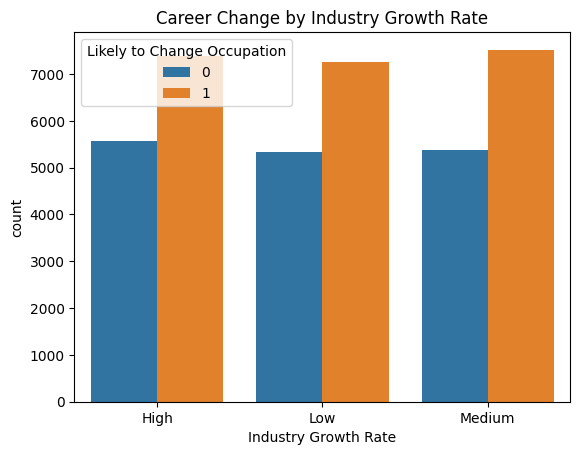

In [27]:
sns.countplot(x='Industry Growth Rate', hue='Likely to Change Occupation', data=data)
plt.title("Career Change by Industry Growth Rate")
plt.show()


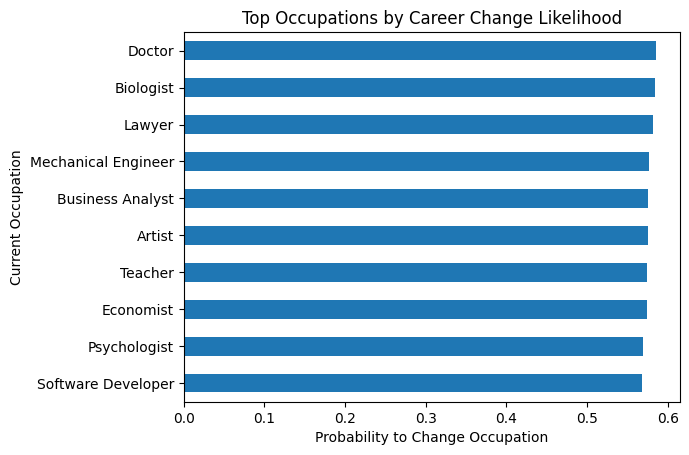

In [28]:
top_jobs = data.groupby('Current Occupation')['Likely to Change Occupation'].mean().sort_values(ascending=False).head(10)
top_jobs.plot(kind='barh')
plt.title('Top Occupations by Career Change Likelihood')
plt.xlabel('Probability to Change Occupation')
plt.gca().invert_yaxis()
plt.show()


מהניתוח עולה כי הן סוג העיסוק הנוכחי והן קצב הצמיחה בתעשייה משפיעים על ההסתברות לשינוי עיסוק. עיסוקים בעלי צמיחה נמוכה (Low Growth) מאופיינים בסבירות גבוהה יותר לעזיבה, בעוד שעיסוקים בתחום טכנולוגי או עסקים עם קצב צמיחה גבוה מציגים יציבות יחסית. כמו כן, במקצועות עם עומס גבוה או שחיקה, נמצאה נטייה גבוהה יותר לשינוי תחום.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_logreg))
print(classification_report(y_test, predictions_logreg))


[[   0 4880]
 [   0 6654]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4880
           1       0.58      1.00      0.73      6654

    accuracy                           0.58     11534
   macro avg       0.29      0.50      0.37     11534
weighted avg       0.33      0.58      0.42     11534



c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [30]:
from sklearn.metrics import roc_auc_score

y_probs = logreg.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_probs)
print("AUC:", round(auc, 2))


AUC: 0.51


In [31]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)


                Feature  Coefficient
6          Psychologist    -0.043123
2                Doctor     0.031121
8               Teacher     0.024781
7    Software Developer    -0.024686
9  Industry Growth Rate     0.023028
3             Economist    -0.018993
1      Business Analyst     0.013200
5   Mechanical Engineer     0.010921
4                Lawyer     0.008384
0             Biologist     0.007082


מראה את מקדם הרגרסיה הלוגיסטית (Logistic Regression Coefficient) של כל אחד מהמשתנים במודל 

"מהמקדמים של הרגרסיה הלוגיסטית עולה כי עיסוק משפיע על ההסתברות לשינוי תחום. למשל, פסיכולוגים ומתכנתים נמצאים בקבוצות עם נטייה נמוכה יחסית לשינוי עיסוק, בעוד רופאים ומורים מציגים נטייה גבוהה יותר. כמו כן, קצב צמיחה גבוה בענף נקשר עם הסתברות גבוהה יותר לשינוי עיסוק – ככל הנראה בשל הזדמנויות חדשות שצצות בענפים אלו."

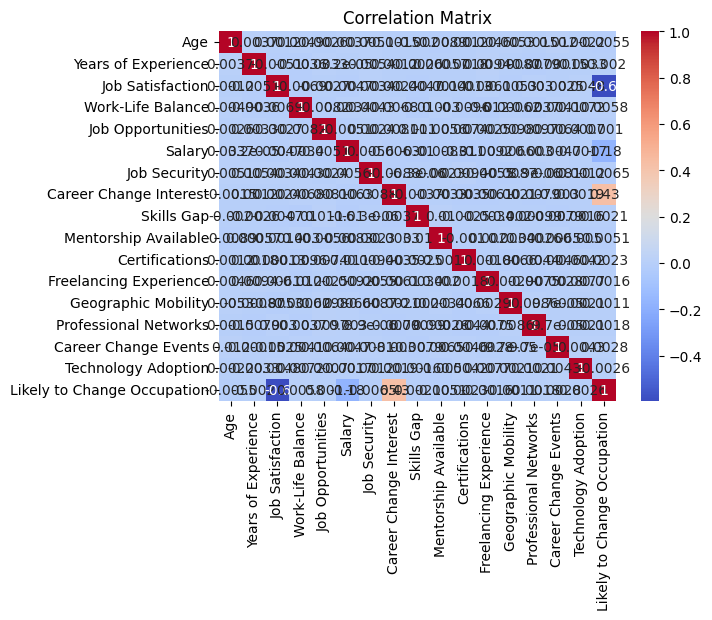

In [32]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
